# Membuat Multi-line Chart dan Kustomisasi Lanjutan
Pada bagian ini kamu akan mempelajari bagaimana membuat multi-line chart dan mengkostumisasinya agar visualisasinya menjadi lebih menarik dan memberikan insight yang berguna.

## Membuat Multi-Line Chart

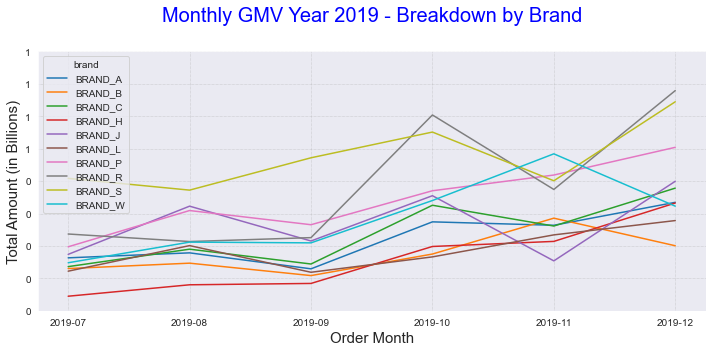

In [1]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

## Kustomisasi Legend

Beberapa parameter yang bisa ditambahkan untuk legend:

* loc: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
'center': legend diletakkan di tengah-tengah axes
'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
* bbox_to_anchor: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
* shadow: jika diisi True, maka kotak legend akan memiliki bayangan.
* ncol: jumlah kolom dari isi legend, default-nya adalah 1
* fontsize: ukuran huruf pada legend
* title: memberikan judul pada legend
* title_fontsize: ukuran huruf pada judul legend

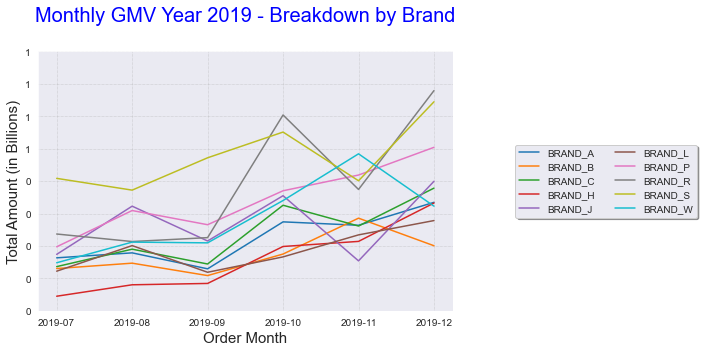

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

## Kustomisasi Colormap

<Figure size 432x288 with 0 Axes>

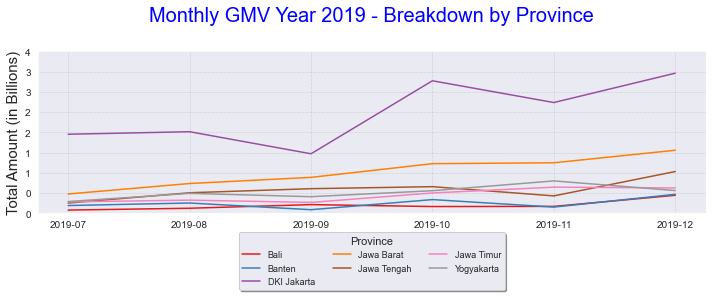

In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.clf()
dataset.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

## Membuat Line Chart GMV Breakdown by Top Provinces

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


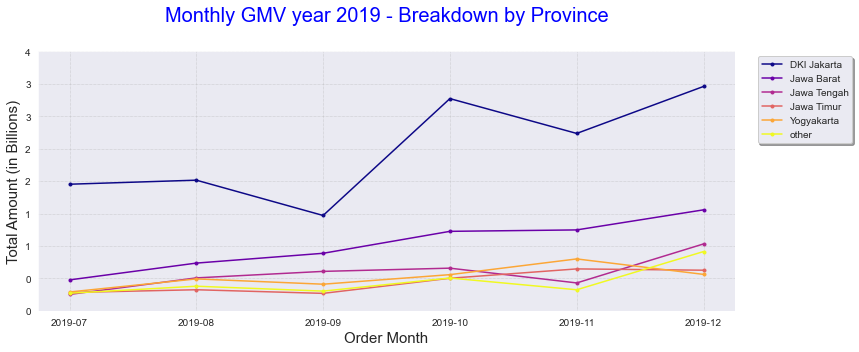

In [4]:
import datetime
import pandas as pd

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

## Membuat Anotasi


Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:

* xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
* arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
* arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
* connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
* color: menentukan warna dari panah

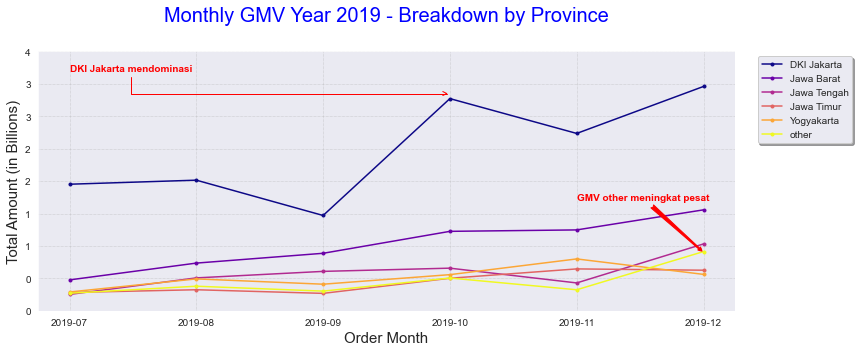

In [5]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
			xytext=(4, 1700000000), weight='bold', color = 'red',
			arrowprops=dict(arrowstyle='fancy',
						   connectionstyle='arc3',
						   color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			xytext=(0, 3700000000), weight='bold', color = 'red',
			arrowprops=dict(arrowstyle='->',
						   connectionstyle='angle',
						   color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()